# Explicite Runge-Kutta method

In [1]:
load("fdm.sage")

## Example 1


In [2]:
var("x,t")
x_exact=-t^2 - 2*t + 2*e^t - 2
pr1=Initial_problem(x,t^2+x,0,1)

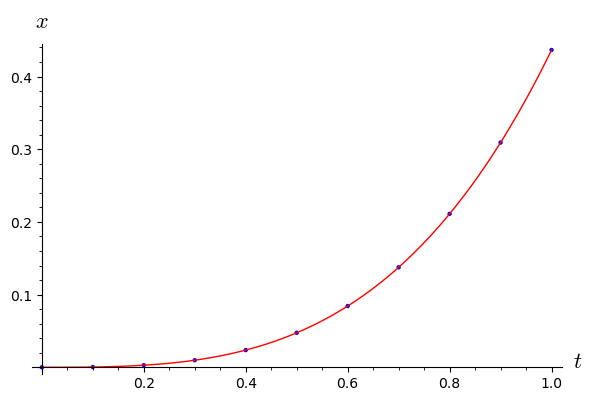

In [3]:
P=erk(pr1, N=10)
P.plot(t,x) + plot(x_exact,(0,1),color='red')

In [4]:
L=[erk(pr1, N = 2^n*10) for n in range(10)]

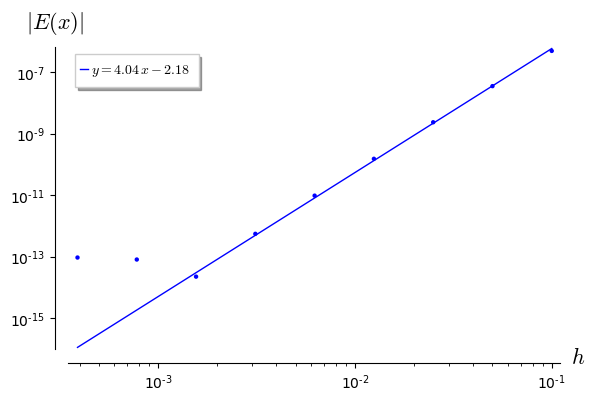

In [10]:
richardson_plot(L,x,0.9, nmin=0, nmax=7)

In [11]:
richardson(L[0],L[1],x,0.8)

[0.211081834707056, -1.86964065414704e-8]

In [12]:
L[1].value(x,0.8) - RR(x_exact.subs(t=0.8))

-2.22778799852108e-8

## Another tableau

In [14]:
B=Butcher_tableau(6,
   [
   [[0,0,0,0,0,0,0,0,0,0,0],[1/2,0,0,0,0,0,0,0,0,0,0],[1/4,1/4,0,0,0,0,0,0,0,0,0],
   [1/7-1/14+3/98*21^(1/2),3/7-5/49*21^(1/2),0,0,0,0,0,0,0,0,0],
   [11/84-1/84*21^(1/2),0,2/7-4/63*21^(1/2),1/12+1/252*21^(1/2),0,0,0,0,0,0,0],
   [5/48-1/48*21^(1/2),0,1/4-1/36*21^(1/2),-77/120-7/180*21^(1/2),63/80+7/80*21^(1/2),0,0,0,0,0,0],
   [5/21+1/42*21^(1/2),0,-48/35-92/315*21^(1/2),211/30+29/18*21^(1/2),-36/5-23/14*21^(1/2),9/5+13/35*21^(1/2),0,0,0,0,0],
   [1/14,0,0,0,1/9+1/42*21^(1/2),13/63+1/21*21^(1/2),1/9,0,0,0,0],
   [1/32,0,0,0,91/576+7/192*21^(1/2),11/72,-385/1152+25/384*21^(1/2),63/128-13/128*21^(1/2),0,0,0],
   [1/14,0,0,0,1/9,-733/2205+1/15*21^(1/2),515/504-37/168*21^(1/2),-51/56+11/56*21^(1/2),132/245-4/35*21^(1/2),0,0],
   [0,0,0,0,-7/3-7/18*21^(1/2),-2/5-28/45*21^(1/2),-91/24+53/72*21^(1/2),301/72-53/72*21^(1/2),28/45+28/45*21^(1/2),49/18+7/18*21^(1/2),0]],
   [1/20,0,0,0,0,0,0,49/180,16/45,49/180,1/20]
   ])

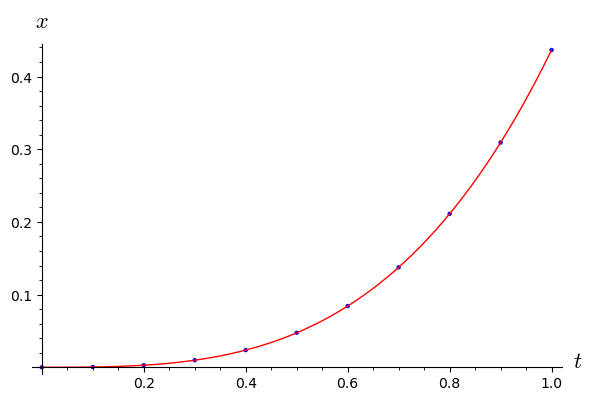

In [15]:
P=erk(pr1, N=10, tableau=B)
P.plot(t,x) + plot(x_exact,(0,1),color='red')

In [24]:
L=[erk(pr1, N = 2^(n+1), tableau=B) for n in range(10)]

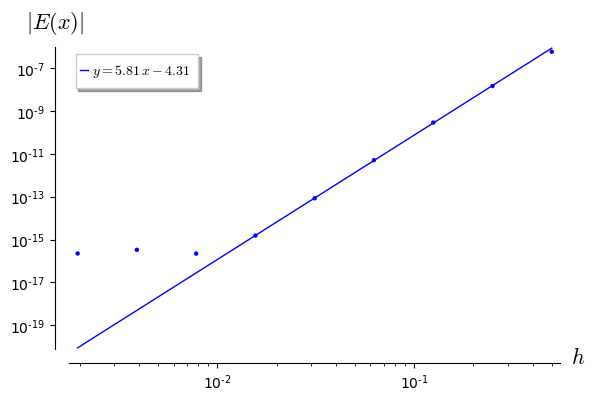

In [29]:
richardson_plot(L,x,1, nmin=1, nmax=6)

In [30]:
richardson(L[4],L[3],x,0.8)

[0.211081856984984, 4.54186952597844e-14]

In [31]:
L[4].value(x,0.8) - RR(x_exact.subs(t=0.8))

4.81281681175005e-14

In [32]:
richardson(L[-1],L[-2],x,0.8)

[0.211081856984935, 8.81129384623140e-19]

In [34]:
L[-1].value(x,0.8)-x_exact.subs(t=0.8)

-2.77555756156289e-16

## Example 2

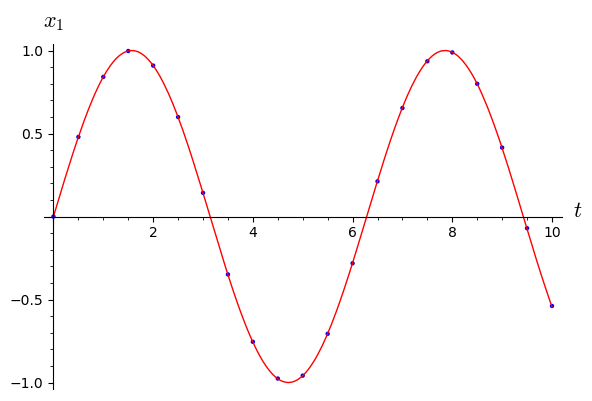

In [35]:
var("x1,x2,t")
pr2=Initial_problem([x1,x2], [x2,-x1],[0,1], 10)
P=erk(pr2, N=20)
P.plot(t,x1) + plot(sin,(0,10),color='red')

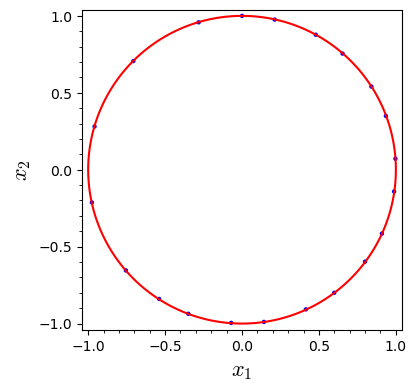

In [36]:
P.plot(x1,x2) + implicit_plot(x1^2+x2^2-1,(x1,-1,1), (x2,-1,1),color='red')

In [37]:
L=[erk(pr2, N=2^n*10) for n in range(10)]

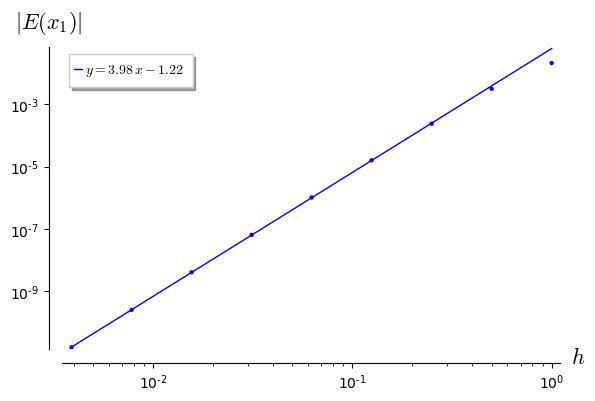

In [40]:
richardson_plot(L,x1,9, nmin=2)

In [41]:
richardson(L[-1],L[-2],x1,9)

[0.412118485242754, 9.92509778067567e-13]

In [42]:
L[-1].value(x1,9)-sin(9).n()

9.97368854172009e-13

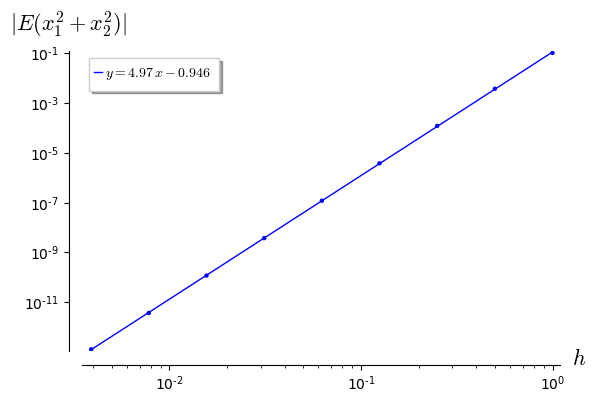

In [43]:
richardson_plot(L,x1^2+x2^2,9)

In [47]:
richardson(L[-1],L[-2],x1^2+x2^2-1,9, delta=-1)

[2.72004641033163e-15, -3.83474614070125e-15]

## Example 3

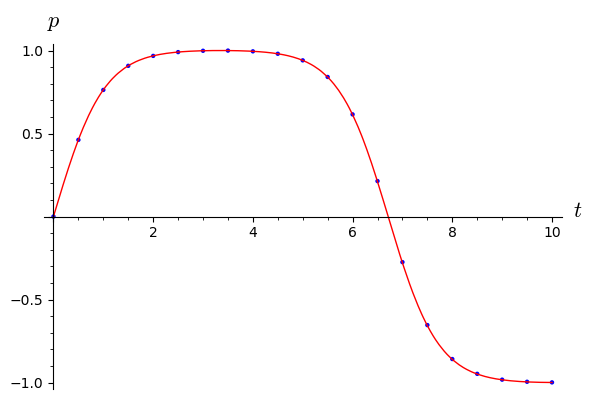

In [50]:
var("p,q,r,t")
k=0.99
pr3=Initial_problem([p,q,r], [q*r,-p*r,-k^2*p*q], [0,1,1], 10)
P=erk(pr3, N=20)
P.plot(t,p)+plot(jacobi('sn', t, k^2),(t,0,10), color='red')

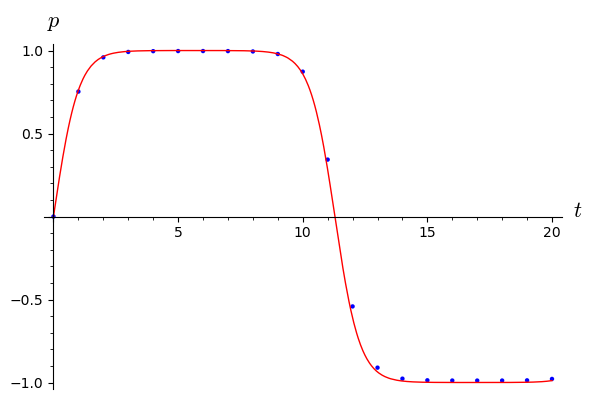

In [52]:
var("p,q,r,t")
k=0.9999
pr3=Initial_problem([p,q,r], [q*r,-p*r,-k^2*p*q], [0,1,1], 20)
P=erk(pr3, N=20)
P.plot(t,p)+plot(jacobi('sn', t, k^2),(t,0,20), color='red')